In [2]:
import numpy as np
import pandas as pd
import pydotplus
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import graphviz

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

In [4]:
data = pd.read_csv('bronx.csv')
 

In [5]:
data

,Age_Group,Gender,Length_of_Stay,Type_of_Admission,APR_Severity_of_Illness_Code,APR_Risk_of_Mortality,APR_Medical_Surgical_Description,Emergency_Department_Indicator,Total_Charges,BronxLebanonHospitalCenterConcourseDivision,...,MontefioreMedicalCenterWakefieldHospital,MontefioreMedicalCenterHenryLucyMosesDiv,LincolnMedicalMentalHealthCenter,CalvaryHospitalInc,SBHHealthSystem,BlackAfricanAmerican,OtherRace,White,Multi,Unknown
0,2,0,4,2,2,0,1,1,26570.74,0,...,0,0,0,0,0,0,1,0,0,0
1,3,0,1,2,3,1,1,1,9701.14,0,...,0,0,0,0,0,0,1,0,0,0
2,3,0,1,2,1,0,1,1,7169.09,0,...,0,0,0,0,0,0,1,0,0,0
3,2,0,4,2,4,3,1,1,33436.83,0,...,0,0,0,0,0,1,0,0,0,0
4,4,1,4,2,2,1,1,1,23454.31,0,...,0,0,0,0,0,1,0,0,0,0
5,3,0,1,2,2,2,1,1,7702.13,0,...,0,0,0,0,0,1,0,0,0,0
6,3,1,7,2,1,0,1,1,40204.33,0,...,0,0,0,0,0,1,0,0,0,0
7,3,1,6,2,2,0,1,1,38579.78,0,...,0,0,0,0,0,0,1,0,0,0
8,2,0,1,2,3,1,1,1,8407.29,0,...,0,0,0,0,0,0,0,1,0,0
9,3,1,1,2,2,0,1,1,7644.98,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
# 4. Split data into training and test sets
y = data.Total_Charges
X = data.drop('Total_Charges', axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)


In [7]:
len(y1_train)

1823

In [25]:
# 5. Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

# 6. Declare hyperparameters to tune
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

# 7. Tune model using cross-validation pipeline
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
# 8. Refit on the entire training set
clf.fit(X1_train, y1_train)


print(clf.best_params_)
# {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto'}
pred = clf.predict(X1_test)
print(r2_score(y1_test, pred))
print(mean_squared_error(y1_test, pred))


{'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 'auto'}
0.8405210476
38916247.3567


In [10]:
#convert to python list
y1_test_list = y1_test.tolist()

In [11]:
#convert to python list
pred1_list = pred.tolist()
pred1_list

[7699.4418789904375,
 21913.110206673184,
 49487.621581428575,
 8965.770383523699,
 8004.742855765874,
 8126.751367777785,
 35014.6254641883,
 29538.08109999999,
 43033.9168333333,
 17076.143520238107,
 17787.803584783553,
 8116.2532933333305,
 32891.00560498223,
 6880.673980721984,
 7065.942114032224,
 9685.909679999993,
 9373.3589,
 8007.998780227271,
 17389.91305797697,
 6711.088800238097,
 8766.800090646855,
 17222.592420833338,
 21057.814387218164,
 6523.393021733026,
 8101.780282244567,
 8184.141992814081,
 19875.398139999976,
 15211.655418055554,
 14538.616513333332,
 16063.828535903907,
 44961.72501500003,
 17052.88982150971,
 7986.449302551223,
 17389.91305797697,
 35014.6254641883,
 17052.88982150971,
 30086.26789926129,
 26950.295892435897,
 7699.4418789904375,
 19575.308995238094,
 19052.405073095237,
 20255.983115013685,
 7192.547358818686,
 27379.76581446066,
 31506.94228570591,
 7360.86124178953,
 32891.00560498223,
 9117.558514761902,
 9550.701661829838,
 7699.441878990

In [13]:
size_pred1 = len(pred1_list) 
errorList1 = []

for i in range(size_pred1):
    absvalue1 = abs(pred1_list[i] - y1_test_list[i])
    error1 = (absvalue1/y1_test_list[i])*100
    errorList1.append(error1)

errorSum1 = sum(errorList1)
finalError1 = errorSum1/len(errorList1)
print(finalError1)


19.07761656942923


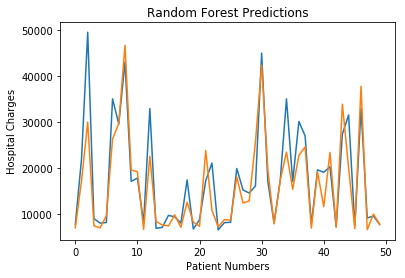

In [41]:

plt.plot(pred1_list[:50], label = 'Random Forest Charges Predictions')
plt.plot(y1_test_list[:50], label= 'Actual Charges')
plt.xlabel("Patient Numbers")
plt.ylabel("Hospital Charges")
plt.title("Random Forest Predictions")
plt.show()

In [37]:
# len(correct)

In [133]:
#METHOD 2
# rf = RandomForestRegressor(n_estimators=20)
# rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [15]:
from sklearn.preprocessing import StandardScaler
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, train_size=0.8, random_state=42)
scaler = StandardScaler().fit(X2_train)
X2_train_scaled = pd.DataFrame(scaler.transform(X2_train), index=X2_train.index.values, columns=X2_train.columns.values)
X2_test_scaled = pd.DataFrame(scaler.transform(X2_test), index=X2_test.index.values, columns=X2_test.columns.values)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X2_train)
cpts = pd.DataFrame(pca.transform(X2_train))
x_axis = np.arange(1, pca.n_components_+1)
pca_scaled = PCA()
pca_scaled.fit(X2_train_scaled)
cpts_scaled = pd.DataFrame(pca.transform(X2_train_scaled))

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X2_train, y2_train)

/Users/nehalrawat/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [16]:
#check what these different correlation values are
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted2_train = rf.predict(X2_train)
predicted2_test = rf.predict(X2_test)
test_score2 = r2_score(y2_test, predicted2_test)
spearman = spearmanr(y2_test, predicted2_test)
pearson = pearsonr(y2_test, predicted2_test)

# print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
# print(f'Test data R-2 score: {test_score:>5.3}')
# print(f'Test data Spearman correlation: {spearman[0]:.3}')
# print(f'Test data Pearson correlation: {pearson[0]:.3}')


In [17]:
pred2_list = predicted2_test.tolist()


In [19]:
y2_test_list = y2_test.tolist()


In [22]:
errorList2 = []
size_pred2 = len(pred2_list) 

for i in range(size_pred2):
    absvalue2 = abs(pred2_list[i] - y2_test_list[i])
    error2 = (absvalue2/y2_test_list[i])*100
    errorList2.append(error2)

errorSum2 = sum(errorList2)
finalError2 = errorSum2/len(errorList2)
print(finalError2)

18.28685484614879


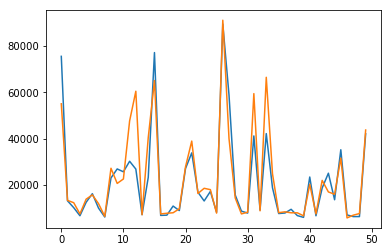

In [23]:
plt.plot(y2_test_list[:50])
plt.plot(pred2_list[:50])
plt.show()